In [203]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [204]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [205]:
reviews_per_month= df['reviews_per_month'].mean()
print(reviews_per_month)
df1 = df.copy()
df1['reviews_per_month'] = df1['reviews_per_month'].fillna(reviews_per_month)
df1.head()

1.3732214298586618


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [206]:
df1 = df1[~((df1['number_of_reviews'] == 0) & (df1['reviews_per_month'] > 0))]
df1 = df1[~((df1['number_of_reviews'] > 0) & (df1['last_review'].isna()))]
df1 = df1[~((df1['number_of_reviews']>0) & (df1['reviews_per_month']<=0))]
df1	

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [207]:
df2 = df1.copy()
print("Unique neighbourhood_group:", df2['neighbourhood_group'].nunique())
print("Unique neighbourhood:", df2['neighbourhood'].nunique())

Unique neighbourhood_group: 5
Unique neighbourhood: 218


In [208]:
avg_price_per_neighbourhood = df2.groupby('neighbourhood')['price'].mean()
print(avg_price_per_neighbourhood.describe())

count    218.000000
mean     117.301577
std       62.081264
min       38.000000
25%       77.867805
50%       95.785185
75%      143.246045
max      482.500000
Name: price, dtype: float64


In [209]:
listing_counts = df2.groupby('neighbourhood')['id'].count()

max_neighbourhoods = listing_counts.nlargest(1)
print("Neighbourhood with most listings:\n", max_neighbourhoods)

min_neighbourhoods = listing_counts.nsmallest(1)
print("Neighbourhood with fewest listings:\n", min_neighbourhoods)

neighbourhoods_fewer_than_10 = (listing_counts < 10).sum()

print("Number of neighbourhoods with fewer than 10 listings:", neighbourhoods_fewer_than_10)


Neighbourhood with most listings:
 neighbourhood
Williamsburg    3163
Name: id, dtype: int64
Neighbourhood with fewest listings:
 neighbourhood
Richmondtown    1
Name: id, dtype: int64
Number of neighbourhoods with fewer than 10 listings: 61


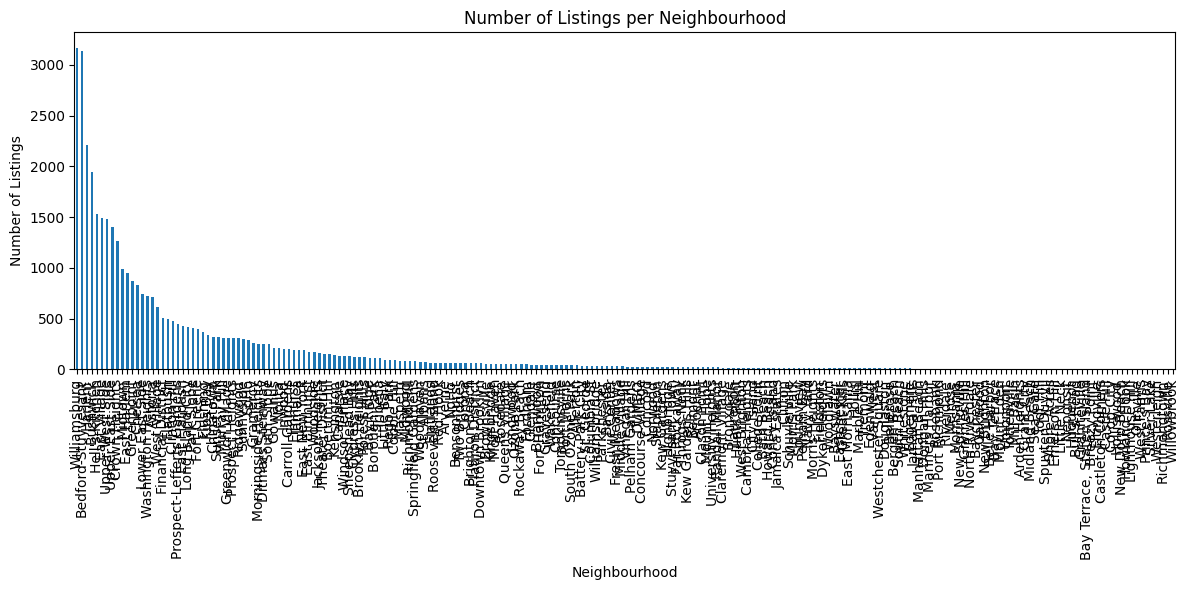

Mean listings per neighbourhood: 197.094488944514
Median listings per neighbourhood: 89.68627450980392
Standard deviation: 227.37772026802125
Lower threshold (mean - std): -30.283231323507238
Upper threshold (mean + std): 424.4722092125353
Town-wise stats:
                      total_listings  unique_neigh  listings_per_neigh
neighbourhood_group                                                  
Bronx                           876            48           18.250000
Brooklyn                      16447            47          349.936170
Manhattan                     16632            32          519.750000
Queens                         4574            51           89.686275
Staten Island                   314            40            7.850000

Median listings per town (listings/unique neighbourhoods): 89.68627450980392


In [210]:
import matplotlib.pyplot as plt

listing_counts = df2.groupby('neighbourhood')['id'].count().sort_values(ascending=False)

plt.figure(figsize=(12,6))
listing_counts.plot(kind='bar')
plt.title("Number of Listings per Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

town_stats = (
    df2.groupby('neighbourhood_group')
    .agg(total_listings=('id', 'count'),
         unique_neigh=('neighbourhood', 'nunique'))
    .assign(listings_per_neigh=lambda x: x['total_listings'] / x['unique_neigh'])
)

median_per_town = town_stats['listings_per_neigh'].median()
mean_val = town_stats['listings_per_neigh'].mean()
std_val = town_stats['listings_per_neigh'].std()
median_val = town_stats['listings_per_neigh'].median()

upper_threshold = mean_val + std_val
lower_threshold = mean_val - std_val

print("Mean listings per neighbourhood:", mean_val)
print("Median listings per neighbourhood:", median_val)
print("Standard deviation:", std_val)
print("Lower threshold (mean - std):", lower_threshold)
print("Upper threshold (mean + std):", upper_threshold)

print("Town-wise stats:\n", town_stats)
print("\nMedian listings per town (listings/unique neighbourhoods):", median_per_town)


In [211]:
listing_counts = df2.groupby('neighbourhood')['id'].count()

small_neighbourhoods = listing_counts[listing_counts < 10].index

df3 = df2.copy()
df3['neighbourhood'] = df3['neighbourhood'].apply(lambda x: 'Other' if x in small_neighbourhoods else x)

df3['neighbourhood'].value_counts()


neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2206
Bushwick              1944
Hell's Kitchen        1532
                      ... 
Tremont                 10
Marble Hill             10
Great Kills             10
East Morrisania         10
Hollis                  10
Name: count, Length: 158, dtype: int64

In [212]:
other_count = (df3['neighbourhood'] == 'Other').sum()
print("Number of listings with neighbourhood = 'Other':", other_count)


Number of listings with neighbourhood = 'Other': 279


In [213]:
df3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [214]:
mean_min_nights = df3['minimum_nights'].mean()

print("Mean:", mean_min_nights)


Mean: 5.868058594856216


In [215]:
df4 = df3[~(df3['minimum_nights'] > 28)].copy()
df4.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [216]:
df4.shape

(35973, 16)

In [217]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('neighbourhood'):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-st)) & (subdf.price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(32482, 16)

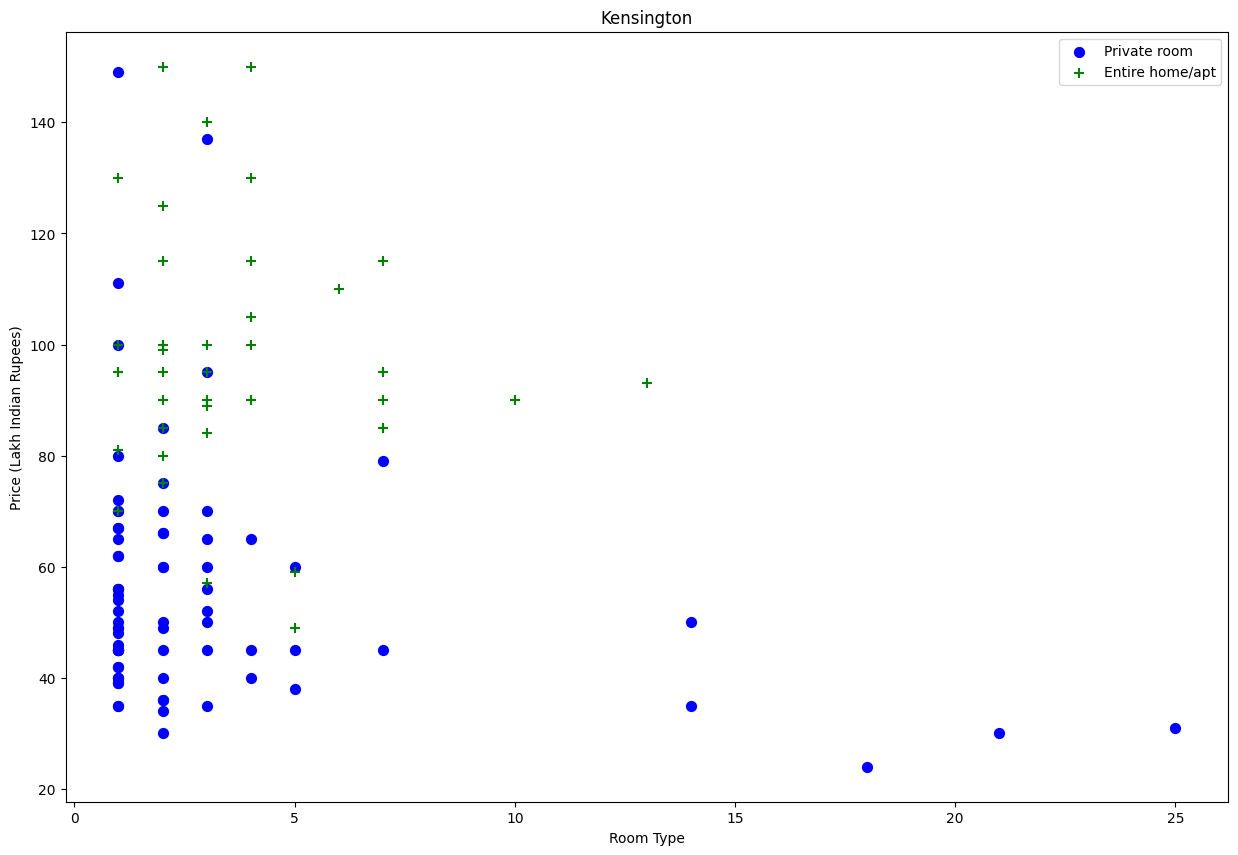

In [218]:
def plot_scatter_chart(df,location):
    private = df[(df.neighbourhood==location) & (df.room_type=='Private room')]
    entire = df[(df.neighbourhood==location) & (df.room_type=='Entire home/apt')]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(private.minimum_nights,private.price,color='blue',label='Private room', s=50)
    plt.scatter(entire.minimum_nights,entire.price,marker='+', color='green',label='Entire home/apt', s=50)
    plt.xlabel("Room Type")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Kensington")

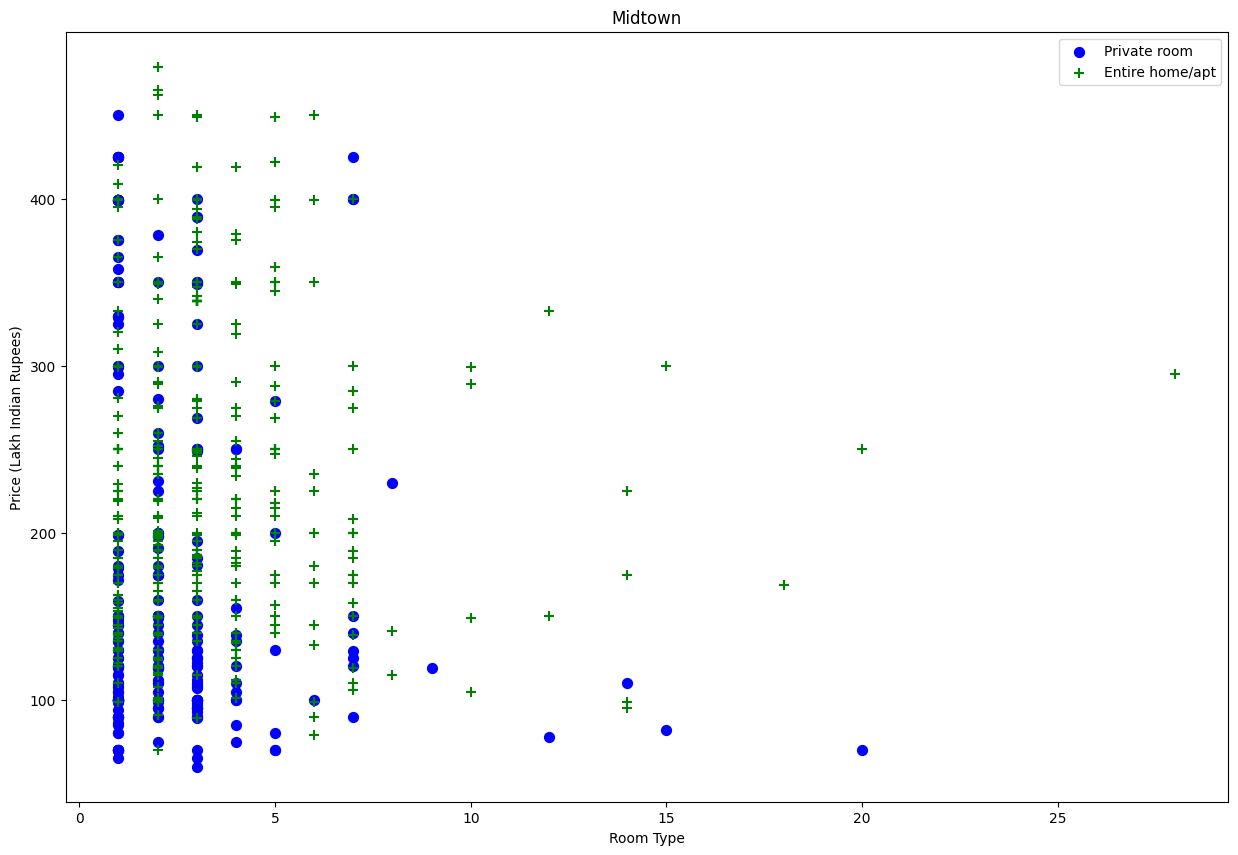

In [219]:
plot_scatter_chart(df5,"Midtown")

In [220]:
import numpy as np
import pandas as pd

def remove_roomtype_outliers(df):
    exclude_indices = np.array([])

    for neighbourhood, neigh_df in df.groupby('neighbourhood'):
        room_stats = {}
        
        for room_type, room_df in neigh_df.groupby('room_type'):
            room_stats[room_type] = {
                'mean': np.mean(room_df.price),
                'std': np.std(room_df.price),
                'count': room_df.shape[0]
            }

        entire_df = neigh_df[neigh_df.room_type == 'Entire home/apt']
        private_stats = room_stats.get('Private room')
        if private_stats and private_stats['count'] > 5:
            exclude_indices = np.append(
                exclude_indices,
                entire_df[entire_df.price < private_stats['mean']].index.values
            )

        shared_df = neigh_df[neigh_df.room_type == 'Shared room']
        if private_stats and private_stats['count'] > 5:
            exclude_indices = np.append(
                exclude_indices,
                shared_df[shared_df.price > private_stats['mean']].index.values
            )

    return df.drop(exclude_indices, axis='index')


df6 = remove_roomtype_outliers(df5)
print("Before:", df5.shape)
print("After removing room-type outliers:", df6.shape)


Before: (32482, 16)
After removing room-type outliers: (31342, 16)


In [221]:
dummies= pd.get_dummies(df6.neighbourhood)


In [222]:
df7 = pd.concat([df6, dummies.drop('Other',axis='columns')], axis='columns')
df7.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,Wakefield,Washington Heights,West Brighton,West Village,Williamsbridge,Williamsburg,Windsor Terrace,Woodhaven,Woodlawn,Woodside
0,182177,A PRIVATE FLAT / APARTMENT- $SPECIAL$,873273,Christian & Carla,Bronx,Allerton,40.86466,-73.85709,Entire home/apt,125,...,False,False,False,False,False,False,False,False,False,False
1,498120,Hi Traveler.. welcome,2459648,Ellen,Bronx,Allerton,40.86870,-73.85240,Private room,35,...,False,False,False,False,False,False,False,False,False,False
2,715270,2 Beds/Queen & Full Beautiful Room 40 minsT.Sq...,3684360,Enrique,Bronx,Allerton,40.85956,-73.87067,Private room,39,...,False,False,False,False,False,False,False,False,False,False
4,773041,Nice beautiful room In the Bronx,3684360,Enrique,Bronx,Allerton,40.85914,-73.86979,Private room,38,...,False,False,False,False,False,False,False,False,False,False
5,3400359,Awesome Deal NYC,16286162,Pat,Bronx,Allerton,40.86677,-73.85938,Private room,49,...,False,False,False,False,False,False,False,False,False,False


In [223]:
df8 = df7.drop('neighbourhood',axis='columns')
df8.head(5)

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,...,Wakefield,Washington Heights,West Brighton,West Village,Williamsbridge,Williamsburg,Windsor Terrace,Woodhaven,Woodlawn,Woodside
0,182177,A PRIVATE FLAT / APARTMENT- $SPECIAL$,873273,Christian & Carla,Bronx,40.86466,-73.85709,Entire home/apt,125,2,...,False,False,False,False,False,False,False,False,False,False
1,498120,Hi Traveler.. welcome,2459648,Ellen,Bronx,40.86870,-73.85240,Private room,35,7,...,False,False,False,False,False,False,False,False,False,False
2,715270,2 Beds/Queen & Full Beautiful Room 40 minsT.Sq...,3684360,Enrique,Bronx,40.85956,-73.87067,Private room,39,2,...,False,False,False,False,False,False,False,False,False,False
4,773041,Nice beautiful room In the Bronx,3684360,Enrique,Bronx,40.85914,-73.86979,Private room,38,1,...,False,False,False,False,False,False,False,False,False,False
5,3400359,Awesome Deal NYC,16286162,Pat,Bronx,40.86677,-73.85938,Private room,49,2,...,False,False,False,False,False,False,False,False,False,False


In [224]:
cols_to_drop = ['id','host_id','name', 'host_name','neighbourhood_group','latitude','longitude']

df9 = df8.drop(columns=cols_to_drop)

df10 = pd.get_dummies(df9, columns=['room_type'], drop_first=True)



In [225]:
df10['last_review'] = pd.to_datetime(df10['last_review'], errors='coerce')

today = pd.to_datetime("today")
df10['days_since_last_review'] = (today - df10['last_review']).dt.days

df11 = df10.drop(columns=['last_review'])

print(df11[['days_since_last_review']].head())

   days_since_last_review
0                    2275
1                    2607
2                    2283
4                    2272
5                    2266


In [226]:
x = df11.drop('price', axis='columns')
y = df11.price


In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [228]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)


0.6157401099749247

In [229]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x,y,cv=cv)

array([0.61763193, 0.61171133, 0.60368824, 0.622208  , 0.61503528])

In [230]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.614055,{'fit_intercept': True}
1,lasso,0.417997,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.328887,"{'criterion': 'squared_error', 'splitter': 'ra..."
